# Naive Bayes Classifier Algorithm

# Description

# Problem Statement

# Importing necessary libraries

In [1]:
#importing required and necessary libraries
import numpy as np # used to perform mathematical operation on array
import pandas as pd # used for data manipulation
import matplotlib.pyplot as plt;
import seaborn as sns
# Set the maximum number of rows and columns to display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\neeli\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading the dataset

In [2]:
data_2014 = pd.read_csv('2014_Financial_Data.csv')
data_2015 = pd.read_csv('2015_Financial_Data.csv')
data_2016 = pd.read_csv('2016_Financial_Data.csv')
data_2017 = pd.read_csv('2017_Financial_Data.csv')
data_2018 = pd.read_csv('2018_Financial_Data.csv')

In [3]:
data_2014 = data_2014.rename(columns={"2015 PRICE VAR [%]": "PRICE VAR [%]"})
data_2015 = data_2015.rename(columns={"2016 PRICE VAR [%]": "PRICE VAR [%]"})
data_2016 = data_2016.rename(columns={"2017 PRICE VAR [%]": "PRICE VAR [%]"})
data_2017 = data_2017.rename(columns={"2018 PRICE VAR [%]": "PRICE VAR [%]"})
data_2018 = data_2018.rename(columns={"2019 PRICE VAR [%]": "PRICE VAR [%]"})

In [4]:
df = pd.concat([data_2014, data_2015, data_2016, data_2017, data_2018],axis=0)
df.to_csv("wow.csv")
df = pd.read_csv("wow.csv")

# Exploratory Data Analysis

In [5]:
df = df.rename(columns={df.columns[1]: "Symbols"})


In [6]:
#Checking the first 5 rows of the train data
df.head()

,Unnamed: 0.1,Symbols,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Gro

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Columns: 226 entries, Unnamed: 0.1 to Class
dtypes: float64(222), int64(2), object(2)
memory usage: 38.1+ MB


In [8]:
df.describe()

,Unnamed: 0.1,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per

In [9]:
df.shape

(22077, 226)

In [10]:
df.columns

Index(['Unnamed: 0.1', 'Symbols', 'Revenue', 'Revenue Growth',
       'Cost of Revenue', 'Gross Profit', 'R&D Expenses', 'SG&A Expense',
       'Operating Expenses', 'Operating Income',
       ...
       'Receivables growth', 'Inventory Growth', 'Asset Growth',
       'Book Value per Share Growth', 'Debt Growth', 'R&D Expense Growth',
       'SG&A Expenses Growth', 'Sector', 'PRICE VAR [%]', 'Class'],
      dtype='object', length=226)

# Data Preprocessing

In [11]:
# Calculate percentage of missing values in each column
missing_percentages = (df.isna().sum() / df.shape[0]) * 100

# Threshold for dropping columns (e.g. 50% missing values)
threshold = 50

# Get list of columns with more than threshold percent missing values
columns_to_drop = missing_percentages[missing_percentages > threshold].index.tolist()
print(columns_to_drop)

['operatingCycle', 'cashConversionCycle']


In [12]:
# Drop columns with high missing values
df.drop(columns_to_drop, axis=1, inplace=True)

In [13]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Select the upper triangle of the correlation matrix
upper = corr.where(mask)

# Find the index of features with correlation greater than a threshold
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

print(to_drop)

[]


In [14]:
# Define target variable and list of features
target_var = "Class"
features = df.select_dtypes(include='number').columns.tolist()
features.remove(target_var)

# Set correlation threshold
corr_threshold = 0.1

# Drop features with low correlation
for feature in features:
    corr = df[feature].corr(df[target_var])
    if abs(corr) < corr_threshold:
        df = df.drop(columns=[feature])
        print(f"Dropped column {feature} due to low correlation with target variable.")


Dropped column Unnamed: 0.1 due to low correlation with target variable.
Dropped column Revenue due to low correlation with target variable.
Dropped column Revenue Growth due to low correlation with target variable.
Dropped column Cost of Revenue due to low correlation with target variable.
Dropped column Gross Profit due to low correlation with target variable.
Dropped column R&D Expenses due to low correlation with target variable.
Dropped column SG&A Expense due to low correlation with target variable.
Dropped column Operating Expenses due to low correlation with target variable.
Dropped column Operating Income due to low correlation with target variable.
Dropped column Interest Expense due to low correlation with target variable.
Dropped column Earnings before Tax due to low correlation with target variable.
Dropped column Income Tax Expense due to low correlation with target variable.
Dropped column Net Income - Non-Controlling int due to low correlation with target variable.
Drop

Dropped column assetTurnover due to low correlation with target variable.
Dropped column currentRatio due to low correlation with target variable.
Dropped column quickRatio due to low correlation with target variable.
Dropped column cashRatio due to low correlation with target variable.
Dropped column daysOfSalesOutstanding due to low correlation with target variable.
Dropped column daysOfInventoryOutstanding due to low correlation with target variable.
Dropped column daysOfPayablesOutstanding due to low correlation with target variable.
Dropped column debtRatio due to low correlation with target variable.
Dropped column debtEquityRatio due to low correlation with target variable.
Dropped column longtermDebtToCapitalization due to low correlation with target variable.
Dropped column totalDebtToCapitalization due to low correlation with target variable.
Dropped column interestCoverage due to low correlation with target variable.
Dropped column cashFlowToDebtRatio due to low correlation 

In [15]:
df.columns

Index(['Symbols', 'operatingProfitMargin', 'Sector', 'Class'], dtype='object')

In [16]:
df.to_csv("hi.csv")
df = pd.read_csv("hi.csv")

In [17]:
df = df.drop("operatingProfitMargin",axis=1)

In [18]:
df.head()

,Unnamed: 0,Symbols,Sector,Class
0,0,PG,Consumer Defensive,0
1,1,VIPS,Consumer Defensive,0
2,2,KR,Consumer Defensive,1
3,3,RAD,Consumer Defensive,1
4,4,GIS,Consumer Defensive,1


In [19]:
df.isnull().sum().sum()

0

In [20]:
df.dtypes

Unnamed: 0     int64
Symbols       object
Sector        object
Class          int64
dtype: object

# Data Visualisation

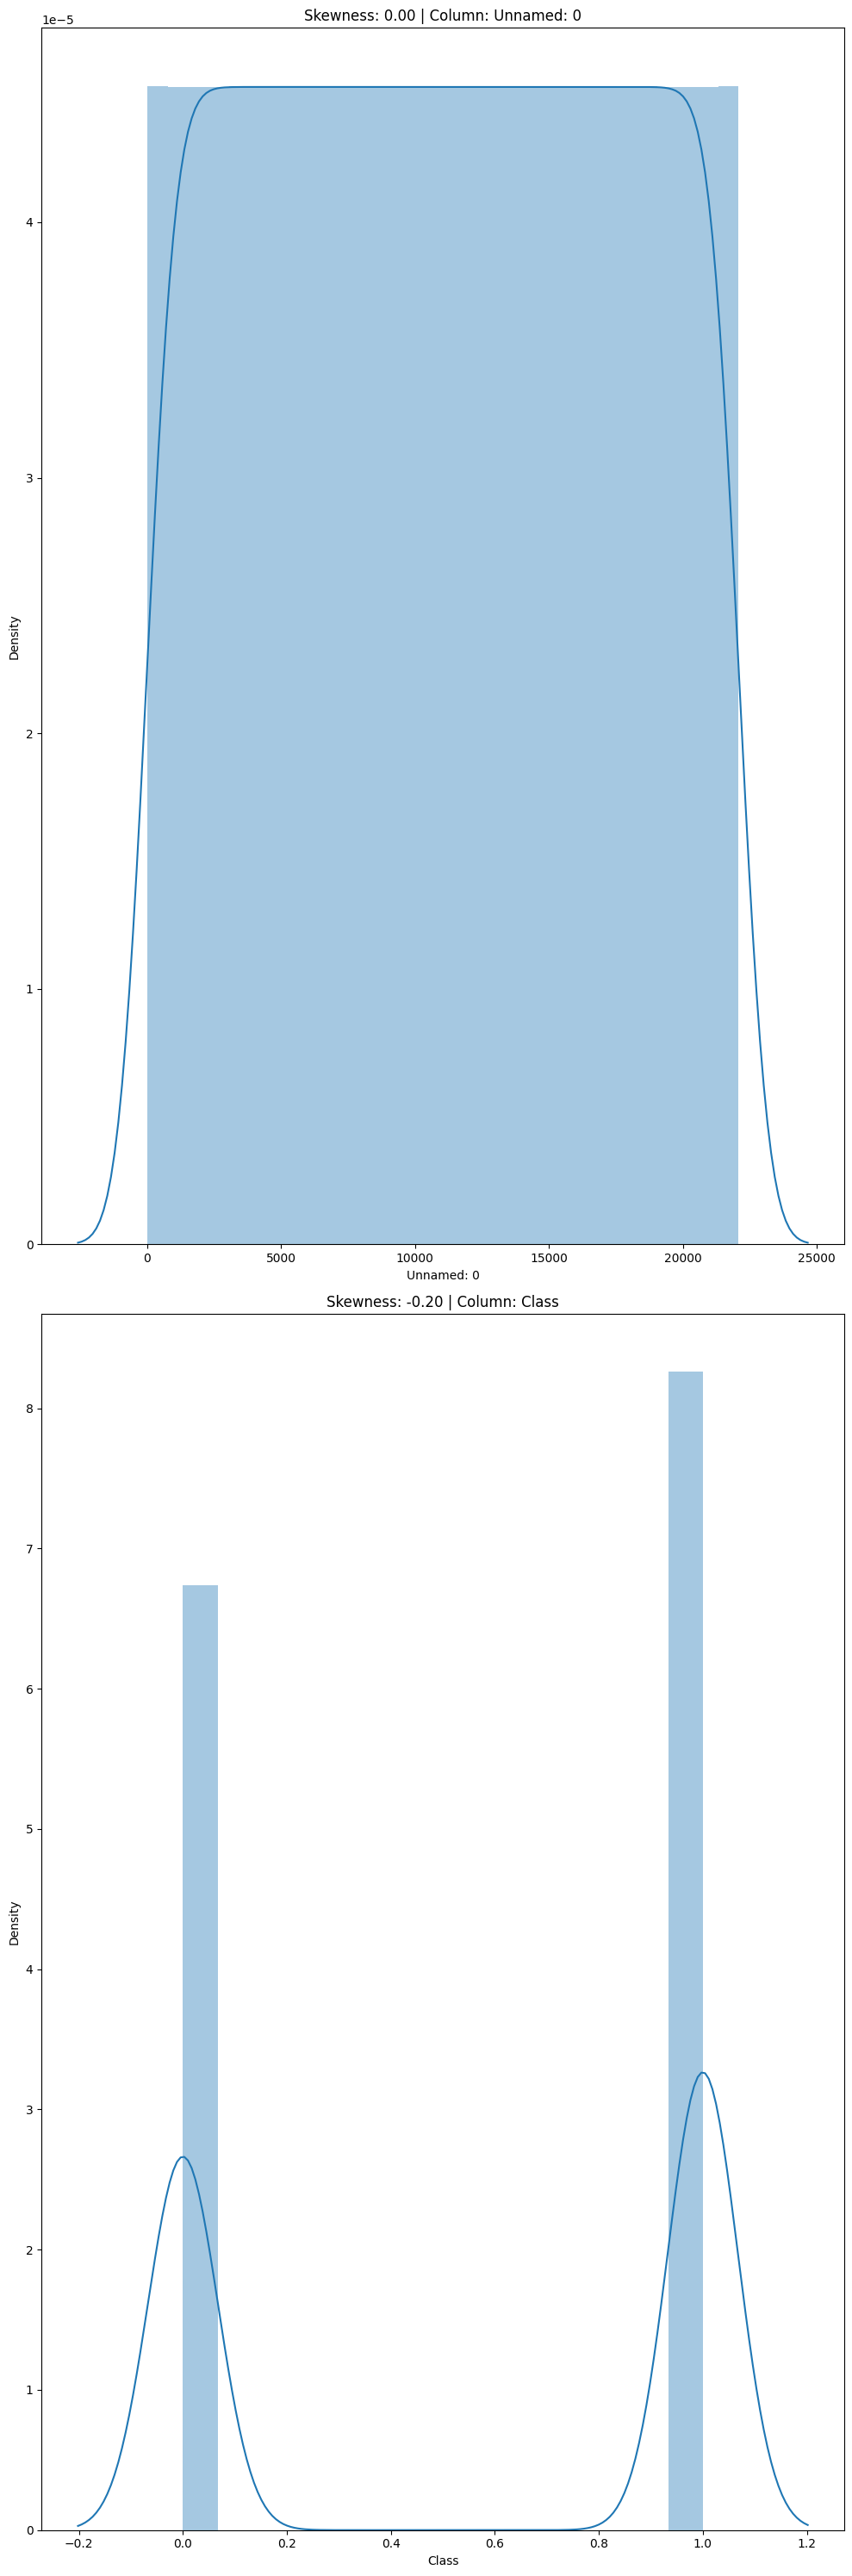

In [21]:
# Get numeric columns in the dataset
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 30))

# Iterate over each numeric column and plot its distribution
for i, col in enumerate(numeric_cols):
    sns.distplot(df[col], ax=axes[i])
    axes[i].set_title("Skewness: {:.2f} | Column: {}".format(df[col].skew(), col))

plt.tight_layout()
plt.show()


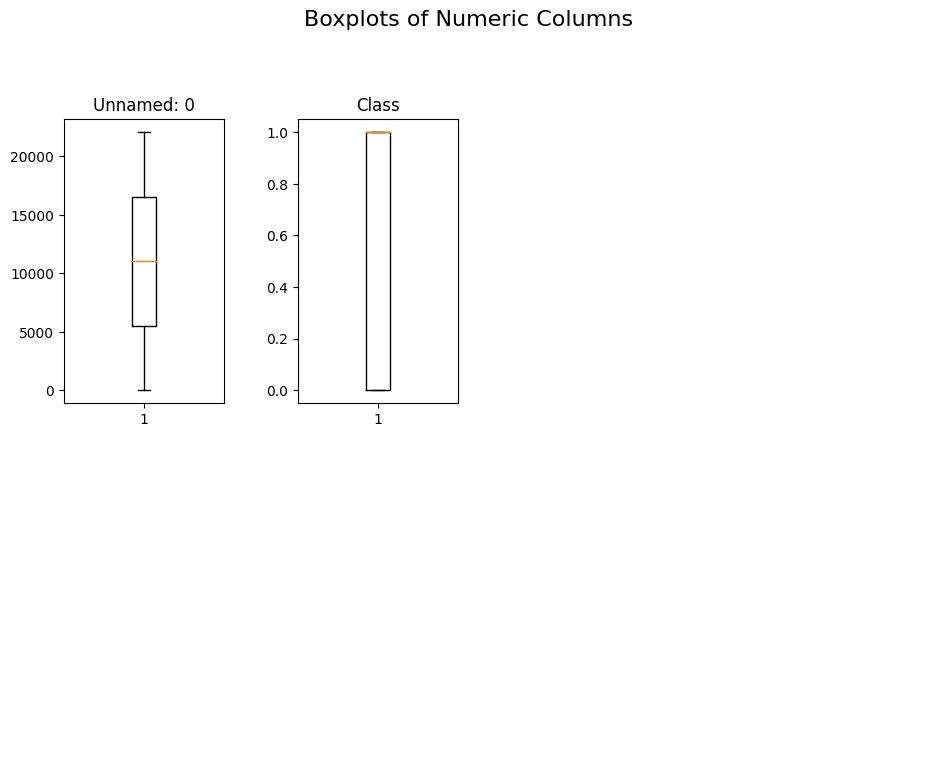

In [22]:
# Get numeric columns in the dataset
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 8))

# Loop through numeric columns
for i, col in enumerate(numeric_cols):
    # Plot boxplot on current subplot
    if i < len(axes.flat):
        ax = axes.flat[i]
        ax.boxplot(df[col].dropna())
        ax.set_title(col)

# Hide empty subplots
for j in range(i + 1, len(axes.flat)):
    axes.flat[j].axis('off')

# Set overall title and adjust layout
fig.suptitle('Boxplots of Numeric Columns', fontsize=16)
fig.tight_layout(pad=3.0)


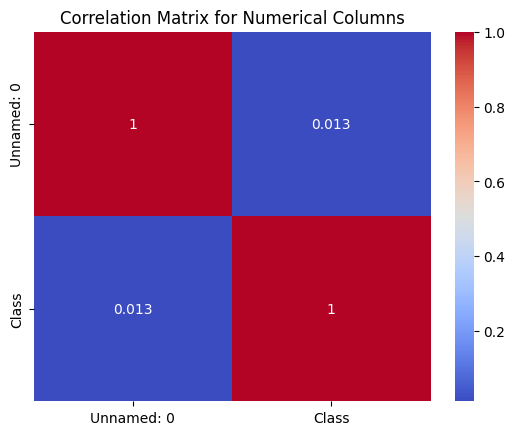

In [23]:
# Select all numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Create correlation matrix
corr_matrix = df[num_cols].corr()

# Create heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()


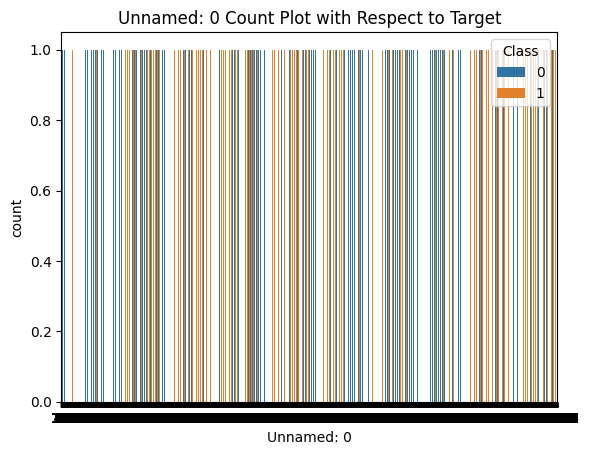

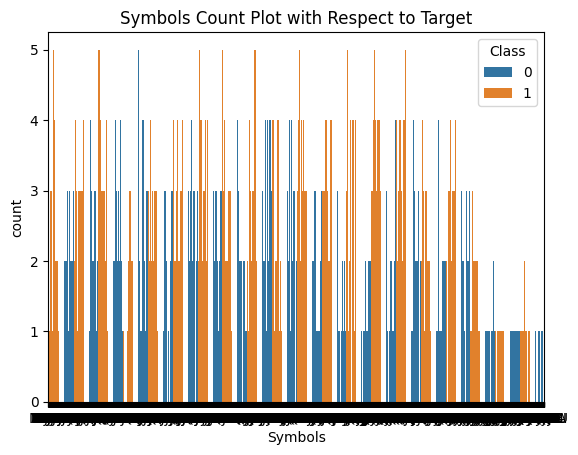

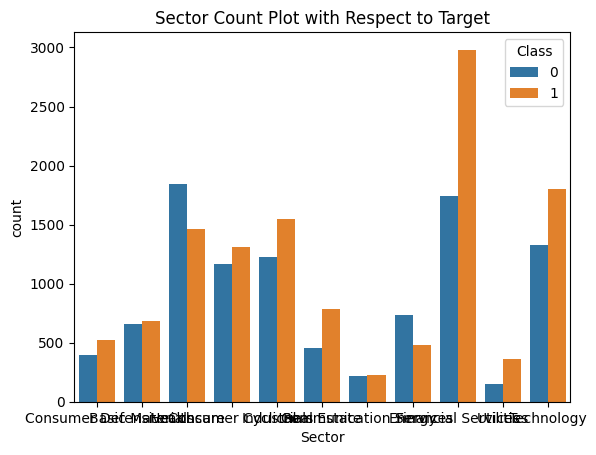

In [24]:
# Loop through all columns except the target column
for col in df.columns.drop("Class"):
    # Create count plot for the current column with respect to the target column
    sns.countplot(data=df, x=col, hue="Class")
    plt.title(f"{col.capitalize()} Count Plot with Respect to Target")
    plt.show()


In [25]:
# Get the unique values in the 'Sector' column
unique_sector = df['Sector'].unique()

# Print the unique sectors
print(unique_sector)

# Get the unique values in the 'Symbols' column
unique_symbols = df['Symbols'].unique()

# Print the unique symbols
print(unique_symbols)



['Consumer Defensive' 'Basic Materials' 'Healthcare' 'Consumer Cyclical'
 'Industrials' 'Real Estate' 'Communication Services' 'Energy'
 'Financial Services' 'Utilities' 'Technology']
['PG' 'VIPS' 'KR' ... 'HYACU' 'IAM' 'LCA']


In [26]:
# Create a mapping of sectors and symbols to integers
sector_mapping = {sector: i for i, sector in enumerate(set(df['Sector']))}
symbol_mapping = {symbol: i for i, symbol in enumerate(set(df['Symbols']))}

# Convert the sector and symbol columns to integers
for i, row in df.iterrows():
    df.at[i, 'Sector'] = sector_mapping[row['Sector']]
    df.at[i, 'Symbols'] = symbol_mapping[row['Symbols']]

# Print the updated finance data
print(df)


       Unnamed: 0 Symbols Sector  Class
0               0    4535      8      0
1               1    4825      8      0
2               2      15      8      1
3               3    4521      8      1
4               4      32      8      1
5               5    3309      8      1
6               6    4256      8      1
7               7     746      8      0
8               8    2697      8      1
9               9    2099      8      1
10             10    3883      8      0
11             11    4334      8      1
12             12     394      8      0
13             13     506      8      1
14             14     658      8      1
15             15     511      8      1
16             16     234      8      1
17             17    4272      8      0
18             18    1732      8      1
19             19    1377      8      1
20             20     985      8      1
21             21    1788      8      1
22             22    4895      8      1
23             23     225      8      1


In [27]:
df.to_csv("hello.csv")
df = pd.read_csv("hello.csv")

# Implementing Gaussian Naive Bayes 

In [28]:
def label_encode(df):
    return pd.factorize(df)[0]


class LabelEncoder:
    def __init__(self):
        self.labels = {}
        self.rev_labels = {}
       
    def fit(self, X, y=None):
        unique_values = np.unique(X)
        for i, val in enumerate(unique_values):
            self.labels[val] = i
            self.rev_labels[i] = val
        return self
   
    def transform(self, X):
        X_encoded = np.zeros_like(X)
        for val, label in self.labels.items():
            X_encoded[X == val] = label
        return X_encoded
   
    def inverse_transform(self, X_encoded):
        X = np.zeros_like(X_encoded)
        for label, val in self.rev_labels.items():
            X[X_encoded == label] = val
        return X

# Convert non-numeric columns to numeric using label encoding
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encode(df[col])


In [29]:
class GaussianNaiveBayes:
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        self.mean = np.zeros((len(self.classes), X_train.shape[1]))
        self.var = np.zeros((len(self.classes), X_train.shape[1]))

        for i, c in enumerate(self.classes):
            X_c = X_train[y_train == c]
            self.mean[i, :] = X_c.mean(axis=0)
            self.var[i, :] = X_c.var(axis=0)

    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        for i, x in enumerate(X_test):
            posteriors = []
            for j, c in enumerate(self.classes):
                prior = np.log(len(X_train[y_train==c]) / len(X_train))
                numerator = np.exp(-1/2 * np.sum(np.power(x - self.mean[j, :], 2) / self.var[j, :]))
                denominator = np.sqrt(2 * np.pi * np.prod(self.var[j, :]))
                posterior = prior + np.log(numerator / denominator)
                posteriors.append(posterior)
            y_pred[i] = self.classes[np.argmax(posteriors)]
        return y_pred
        

class Pipeline:
    """A pipeline class that applies a sequence of transformations"""
    def __init__(self, steps):
        self.steps = steps
    
    def fit(self, X, y=None):
        for step in self.steps:
            X = step.fit_transform(X, y)
        return self
    
    def transform(self, X):
        for step in self.steps:
            X = step.transform(X)
        return X

# Define the KNN classifier pipeline
class GNBPipeline:
    def __init__(self, preprocessor, gnb):
        self.preprocessor = preprocessor
        self.gnb = gnb

    def fit(self, X, y=None):
        X, y = self.preprocessor.fit_transform(X, y)
        self.gnb.fit(X, y)
        return self

    def predict(self, X):
        X, _ = self.preprocessor.fit_transform(X)
        return self.gnb.predict(X)

    def score(self, X, y):
        return np.mean(self.predict(X) == y)

In [30]:

def zscore(X, threshold=3):
    """Detect and treat outliers using the Z-score"""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    z_scores = np.abs((X - mean) / std)
    is_outlier = z_scores > threshold
    X_treated = np.where(is_outlier, mean, X)
    return X_treated

def handle_missing_values(X, strategy='mean'):
    """Handle missing values by filling in with the mean or most frequent value"""
    if strategy == 'mean':
        fill_value = np.nanmean(X, axis=0)
    elif strategy == 'most_frequent':
        fill_value = np.nanmedian(X, axis=0)
    else:
        raise ValueError(f"Invalid strategy: {strategy}")
    X_filled = np.where(np.isnan(X), fill_value, X)
    return X_filled

def handle_special_characters(X, value=-1):
    """Replace special characters with a specified value"""
    X[X == '?'] = value
    return X

class SimpleImputer:
    """A simple imputer class that fills missing values with the mean or most frequent value"""
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        self.fill_value = None
    
    def fit(self, X):
        if self.strategy == 'mean':
            self.fill_value = np.nanmean(X, axis=0)
        elif self.strategy == 'most_frequent':
            self.fill_value = np.nanmedian(X, axis=0)
        else:
            raise ValueError(f"Invalid strategy: {self.strategy}")
        return self
    
    def transform(self, X):
        if self.fill_value is None:
            raise ValueError("SimpleImputer has not been fit yet.")
        X_filled = np.where(np.isnan(X), self.fill_value, X)
        return X_filled
    
class StandardScaler:
    """A standard scaler class that standardizes the features"""
    def __init__(self):
        self.mean_ = None
        self.std_ = None
    
    def fit(self, X):
        self.mean_ = np.nanmean(X, axis=0)
        self.std_ = np.nanstd(X, axis=0)
        return self
    
    def transform(self, X):
        if self.mean_ is None or self.std_ is None:
            raise ValueError("StandardScaler has not been fit yet.")
        X_scaled = (X - self.mean_) / self.std_
        return X_scaled


class KFold:
    def __init__(self, n_splits=5, shuffle=False):
        self.n_splits = n_splits
        self.shuffle = shuffle
        
    def split(self, X):
        indices = np.arange(X.shape[0])
        if self.shuffle:
            np.random.shuffle(indices)
        fold_sizes = np.full(self.n_splits, X.shape[0] // self.n_splits, dtype=int)
        fold_sizes[:X.shape[0] % self.n_splits] += 1
        current = 0
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            yield indices[start:stop], indices[stop:]
            current = stop

def cross_val_score(estimator, X, y, cv, scoring):
    scores = []
    for train_idx, test_idx in cv.split(X):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        estimator.fit(X_train, y_train)
        y_pred = estimator.predict(X_test)
        score = scoring(y_test, y_pred)
        scores.append(score)
    return scores

# Define train-test-split function
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    
    n_samples = X.shape[0]
    n_test = int(test_size * n_samples)
    
    shuffled_indices = np.random.permutation(n_samples)
    test_indices = shuffled_indices[:n_test]
    train_indices = shuffled_indices[n_test:]
    
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Define the preprocessing steps for numeric and categorical columns
class NumericTransformer:
    def __init__(self, zscore, handle_missing_values, scaler):
        self.zscore = zscore
        self.handle_missing_values = handle_missing_values
        self.scaler = scaler

    def fit_transform(self, X, y=None):
        X = self.zscore(X)
        X = self.handle_missing_values(X)
        X = self.scaler(X)
        return X


class CategoricalTransformer:
    def __init__(self, handle_special_characters, onehot_encoder):
        self.handle_special_characters = handle_special_characters
        self.onehot_encoder = onehot_encoder

    def fit_transform(self, X, y=None):
        X = self.handle_special_characters(X)
        X = self.onehot_encoder(X)
        return X


class TargetTransformer:
    def __init__(self, label_encoder):
        self.label_encoder = label_encoder

    def fit_transform(self, X, y=None):
        y = self.label_encoder(y)
        return y


# Define the preprocessing pipeline with feature scaling, encoding, and label encoding
class Preprocessor:
    def __init__(self, numeric_transformer, categorical_transformer, target_transformer):
        self.numeric_transformer = numeric_transformer
        self.categorical_transformer = categorical_transformer
        self.target_transformer = target_transformer

    def fit_transform(self, X, y=None):
        X = self.numeric_transformer.fit_transform(X)
        X = self.categorical_transformer.fit_transform(X)
        y = self.target_transformer.fit_transform(y)
        return X, y



In [31]:
class ColumnTransformer:
    """A column transformer class that applies different transformations to different columns"""
    def __init__(self, transformers):
        self.transformers = transformers
    
    def fit(self, X):
        self.transformers_ = []
        for name, transformer, columns in self.transformers:
            transformer.fit(X[:, columns])
            self.transformers_.append((name, transformer, columns))
        return self
    
    def transform(self, X):
        X_transformed = []
        for name, transformer, columns in self.transformers_:
            X_transformed.append(transformer.transform(X[:, columns]))
        return np.hstack(X_transformed)

In [32]:
# set a seed for reproducibility
np.random.seed(123)

# shuffle the data
data = df.sample(frac=1, random_state=123).reset_index(drop=True)

# define the percentage of data to use for training
train_pct = 0.8

# split the data into training and testing sets
train_size = int(len(data) * train_pct)
X_train, y_train = data.iloc[:train_size, :-1].values, data.iloc[:train_size, -1].values
X_test, y_test = data.iloc[train_size:, :-1].values, data.iloc[train_size:, -1].values


# Define the preprocessing steps for numeric and categorical columns
numeric_transformer = Pipeline(steps=[
    ('outlier_treatment', zscore),
    ('missing_value_handling', handle_missing_values),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('label_encoding', LabelEncoder())
])

# Define the preprocessing pipeline with feature scaling and label encoding
preprocessor = ColumnTransformer(transformers=[  
    ('num', numeric_transformer),
    ('cat', categorical_transformer)
])

# Define the KNN classifier pipeline
gnb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gnb', GaussianNaiveBayes())
])


# Define the X and y variables
X = df.drop("Class", axis=1)
y = df["Class"]





In [33]:
preprocessor

In [34]:
X=np.array(X) # converting X into numpy array
y=np.array(y) # converting y into numpy array


In [35]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
import time
# record start time
start_time = time.time()

In [52]:
# Fit the KNN classifier on the training data
gnb = GaussianNaiveBayes()
# Fit the GNB classifier pipeline on the training data
gnb.fit(X_train, y_train)

In [53]:
# record end time
end_time = time.time()

# calculate the time taken to fit the model
time_taken = end_time - start_time

# print the time taken
print("Time taken to run the model: {:.2f} seconds".format(time_taken))

Time taken to run the model: 0.77 seconds


In [38]:
# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Creating confusion matrix

Normalized confusion matrix
[[0.5572943  0.4427057 ]
 [0.52759382 0.47240618]]


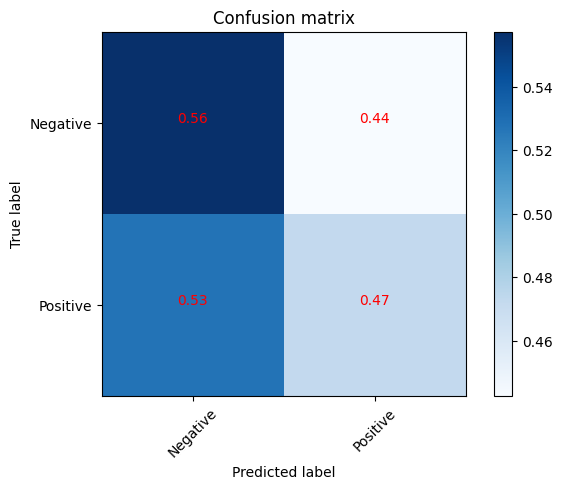

In [46]:
def confusion_matrix(y_pred, y_test): 
    matrix = np.zeros((2,2)) 
    for i in range(len(y_pred)): 
        if int(y_pred[i])==1 and int(y_test[i])==1: 
            matrix[0,0]+=1 #True Positives
        elif int(y_pred[i])==1 and int(y_test[i])==0:
            matrix[0,1]+=1 #False Positives
        elif int(y_pred[i])==0 and int(y_test[i])==1:
            matrix[1,0]+=1 #False Negatives
        elif int(y_pred[i])==0 and int(y_test[i])==0:
            matrix[1,1]+=1 #True Negatives
    accuracy = (matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0])
    precision = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    recall = matrix[0,0]/(matrix[0,0]+matrix[1,0])
    f1 = 2 * (precision * recall) / (precision + recall)
    return matrix,accuracy, precision, recall, f1

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm, accuracy, precision, recall, f1 = confusion_matrix(y_pred, y_test)
plot_confusion_matrix(cm, classes=['Negative', 'Positive'], normalize=True, title='Confusion matrix')

# Computing Classification report

In [47]:
# Define a function to compute the classification report
def classification_report(y_test, y_pred):
    classes = np.unique(y_test)
    report = {'accuracy': np.mean(y_test == y_pred)}

    # Compute precision, recall, and F1-score for each class
    for c in classes:
        true_indices = np.where(y_test == c)[0]
        pred_indices = np.where(y_pred == c)[0]
        tp = len(np.intersect1d(true_indices, pred_indices))
        fp = len(pred_indices) - tp
        fn = len(true_indices) - tp
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        report[c] = {'precision': precision, 'recall': recall, 'f1-score': f1_score, 'support': len(true_indices)}

    # Compute macro-average precision, recall, and F1-score
    macro_precision = np.mean([report[c]['precision'] for c in classes])
    macro_recall = np.mean([report[c]['recall'] for c in classes])
    macro_f1_score = np.mean([report[c]['f1-score'] for c in classes])
    report['macro avg'] = {'precision': macro_precision, 'recall': macro_recall, 'f1-score': macro_f1_score,
                           'support': len(y_test)}

    # Compute micro-average precision, recall, and F1-score
    micro_precision = np.sum([report[c]['precision'] * report[c]['support'] for c in classes]) / len(y_test)
    micro_recall = np.sum([report[c]['recall'] * report[c]['support'] for c in classes]) / len(y_test)
    micro_f1_score = np.sum([report[c]['f1-score'] * report[c]['support'] for c in classes]) / len(y_test)
    report['micro avg'] = {'precision': micro_precision, 'recall': micro_recall, 'f1-score': micro_f1_score,
                           'support': len(y_test)}

    return report

# Compute the classification report
report = classification_report(y_test, y_pred)

# Define the column names for the table
columns = ['Class', 'Precision', 'Recall', 'F1-score', 'Support']

# Create the table object
from prettytable import PrettyTable
table = PrettyTable(columns)

# Add the rows to the table
for c in report.keys():
    if c not in ['accuracy', 'macro avg', 'micro avg']:
        precision = report[c]['precision']
        recall = report[c]['recall']
        f1_score = report[c]['f1-score']
        support = report[c]['support']
        row = [c, precision, recall, f1_score, support]
        table.add_row(row)

# Add the macro-average row to the table
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1_score = report['macro avg']['f1-score']
macro_support = report['macro avg']['support']
macro_row = ['macro avg', macro_precision, macro_recall, macro_f1_score, macro_support]
table.add_row(macro_row)

micro_precision = report['micro avg']['precision']
micro_recall = report['micro avg']['recall']
micro_f1_score = report['micro avg']['f1-score']
micro_support = report['micro avg']['support']
micro_row = ['micro avg', micro_precision, micro_recall, micro_f1_score, micro_support]
table.add_row(micro_row)

print(table)


+-----------+---------------------+---------------------+---------------------+---------+
|   Class   |      Precision      |        Recall       |       F1-score      | Support |
+-----------+---------------------+---------------------+---------------------+---------+
|     0     | 0.47240618101545256 | 0.10873983739837398 | 0.17678645187938868 |   1968  |
|     1     |  0.5572942958101968 |  0.9023293829178586 |  0.6890310500858168 |   2447  |
| macro avg |  0.5148502384128247 |  0.5055346101581163 | 0.43290875098260273 |   4415  |
| micro avg |  0.5194551542663561 |  0.5485843714609286 |  0.4606964251095426 |   4415  |
+-----------+---------------------+---------------------+---------------------+---------+


# Performing evaluation metrics

In [48]:
def confusion_matrix(y_pred, y_test): 
    matrix = np.zeros((2,2)) 
    for i in range(len(y_pred)): 
        if int(y_pred[i])==1 and int(y_test[i])==1: 
            matrix[0,0]+=1 #True Positives
        elif int(y_pred[i])==1 and int(y_test[i])==0:
            matrix[0,1]+=1 #False Positives
        elif int(y_pred[i])==0 and int(y_test[i])==1:
            matrix[1,0]+=1 #False Negatives
        elif int(y_pred[i])==0 and int(y_test[i])==0:
            matrix[1,1]+=1 #True Negatives
    accuracy = (matrix[0,0]+matrix[1,1])/(matrix[0,0]+matrix[1,1]+matrix[0,1]+matrix[1,0])
    precision = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    recall = matrix[0,0]/(matrix[0,0]+matrix[1,0])
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1

In [49]:
accuracy, precision, recall, f1 = confusion_matrix(y_pred, y_test)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.5485843714609286
Precision: 0.5572942958101968
Recall: 0.9023293829178586
F1 score: 0.6890310500858168


# Plotting ROC curve

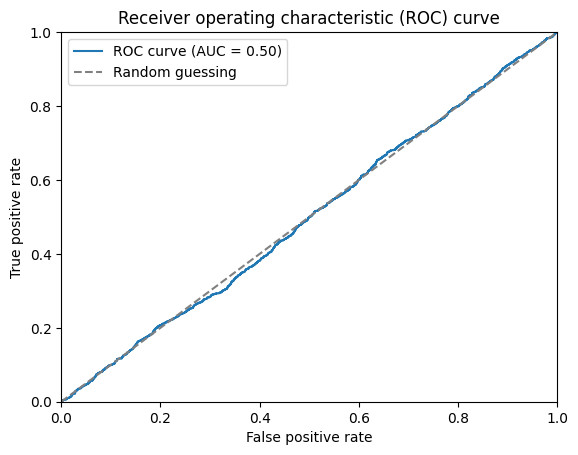

In [50]:
# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
sorted_indices = np.argsort(y_pred)[::-1]
sorted_y_true = y_test[sorted_indices]
cumulative_tp = np.cumsum(sorted_y_true)
cumulative_fp = np.cumsum(1 - sorted_y_true)
tpr = cumulative_tp / cumulative_tp[-1]
fpr = cumulative_fp / cumulative_fp[-1]
thresholds = y_pred[sorted_indices]

# Convert arrays to integer type
sorted_indices = sorted_indices.astype(int)

# Calculate the AUC-ROC score using the trapezoidal rule
auc_roc = np.trapz(tpr, fpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guessing')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend()
plt.show()

In [41]:
num_zeros_ytest = len(y_test) - np.count_nonzero(y_test)
num_ones_ytest = np.count_nonzero(y_test)

print(f"Number of zeros in y_test: {num_zeros_ytest} ({num_zeros_ytest/len(y_test)*100:.2f}%)")
print(f"Number of ones in y_test: {num_zeros_ytest} ({num_zeros_ytest/len(y_test)*100:.2f}%)")

num_zeros_ypred = len(y_pred) - np.count_nonzero(y_pred)
num_ones_ypred = np.count_nonzero(y_pred)

print(f"Number of zeros in y_pred: {num_zeros_ypred} ({num_zeros_ypred/len(y_pred)*100:.2f}%)")
print(f"Number of ones in y_pred: {num_ones_ypred} ({num_ones_ypred/len(y_pred)*100:.2f}%)")


Number of zeros in y_test: 1968 (44.58%)
Number of ones in y_test: 1968 (44.58%)
Number of zeros in y_pred: 453 (10.26%)
Number of ones in y_pred: 3962 (89.74%)


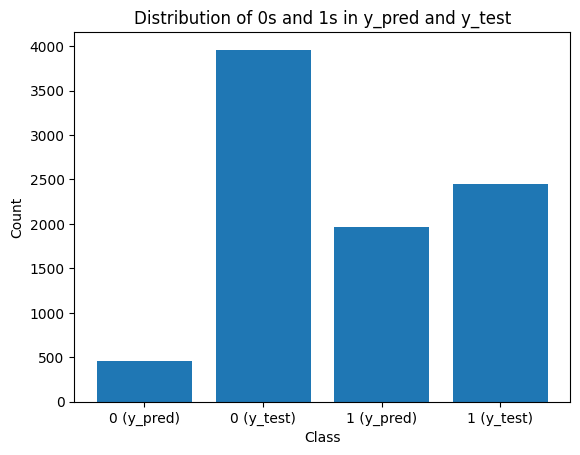

In [42]:
fig, ax = plt.subplots()
num_zeros_ypred, num_ones_ypred = np.bincount(y_pred.astype(int))
num_zeros_ytest, num_ones_ytest = np.bincount(y_test.astype(int))
ax.bar([0, 1, 2, 3], [num_zeros_ypred, num_ones_ypred, num_zeros_ytest, num_ones_ytest])
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(["0 (y_pred)", "0 (y_test)", "1 (y_pred)", "1 (y_test)"])
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_title("Distribution of 0s and 1s in y_pred and y_test")
plt.show()
